In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToTensor
from model_super_resolution import Net
from super_resolution_data_loader import *

import os
from os import listdir
from math import log10
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
#input_image = 'test_images_32/img5.png'
input_image = 'results/test_images_64/img5.png'

test_img = Image.open(input_image).convert('YCbCr')
y, cb, cr = test_img.split()

test_img = np.array(test_img)

In [3]:
model = Net(upscale_factor = 2).to(device)
model = torch.load("trained_models/super_res_model_epoch_500_64.pth")

In [4]:
img_to_tensor = ToTensor()

input_ = img_to_tensor(y).view(1, -1, y.size[1], y.size[0])

model = model.cuda()
input_ = input_.cuda()

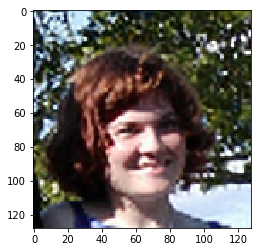

In [5]:
out = model(input_)
out = out.cpu()

out_img_y = out[0].detach().numpy()
out_img_y *= 255.0
out_img_y = out_img_y.clip(0, 255)
out_img_y = Image.fromarray(np.uint8(out_img_y[0]), mode='L')

out_img_cb = cb.resize(out_img_y.size, Image.BICUBIC)
out_img_cr = cr.resize(out_img_y.size, Image.BICUBIC)
out_img = Image.merge('YCbCr', [out_img_y, out_img_cb, out_img_cr]).convert('RGB')

#out_img.save('test_super_res.png')

_ = plt.imshow(out_img)